# Tugas Pemrograman 02 – Reasoning 

Kelompok 6
1.   Hilman Taris Muttaqin
2.   Herjanto Janawisuta


# 1. Deskripsi Tugas
Diberikan file bengkel.xlsx berupa himpunan data 100 bengkel mobil yang ada di kota
Bandung dengan dua atribut: Kualitas Servis (bilangan real 1-100; semakin tinggi semakin baik)
dan Harga (bilangan real 1-10, semakin tinggi semakin mahal). Bangunlah sebuah sistem berbasis
Fuzzy Logic untuk memilih 10 bengkel terbaik di kota Bandung. Sistem membaca masukan file
bengkel.xlsx dan mengeluarkan output berupa sebuah file peringkat.xlsx yang berisi 10 nomor/ID
bengkel terbaik beserta skor-nya (output Defuzzification).

Poin-poin yang harus Anda desain dan analisis:
* Jumlah dan Nama Linguistik setiap atribut input
* Bentuk dan Batas Fungsi Keanggotaan Input
* Aturan Inferensi
* Metode Defuzzification
* Bentuk dan Batas Fungsi Keanggotaan Output (sesuai metode Defuzzification)

Catatan: Poin-poin di atas harus ada di dalam Laporan Tugas!
Proses yang harus Anda implementasikan ke dalam program (bisa berbentuk fungsi/prosedur):
* Membaca data dari file
* Fuzzification
* Inferensi
* Defuzzification
* Menyimpan output ke file

Catatan: Proses-proses di atas harus dibangun tanpa menggunakan Library!

## Import Files Bengkel.xlsx

In [8]:
import pandas as pd
from google.colab import files
bengkel = files.upload()
Data = pd.read_excel('bengkel.xlsx')
print(Data)

# constant definition

# membership function for service quality
HIGH = 0
AVERAGE = 1
LOW = 2

# membership function for price
EXPENSIVE = 0
AFFORDABLE = 1
CHEAP = 2

# inference result
GOOD = 0
NORMAL = 1
BAD = 2

id = Data["id"]
servis = Data["servis"]
harga = Data["harga"]

Saving bengkel.xlsx to bengkel (1).xlsx
     id  servis  harga
0     1      58      7
1     2      54      1
2     3      98      2
3     4      52      4
4     5      11      4
..  ...     ...    ...
95   96      30      1
96   97      25      3
97   98      27     10
98   99       8      6
99  100      11      8

[100 rows x 3 columns]


# Fuzzification
*   Kualitas Servis : High, Average, Low
*   Harga : Expensive, Affordable, Cheap
*   Score : Good, Normal, Bad

Transform crisp input into fuzzy values based-on its corresponding Membership Function



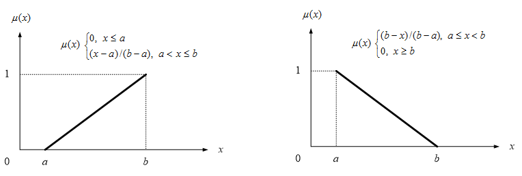

# Member Function for servis

*  **servis**>=70 is definitely **High** and **servis**<50 is definitely not **High** 
*   **Average** **servis** is considered between 40 to 60, while **servis**<=30 or **servis**>=70 is considered not average
*  **servis**<=30 is definitely **Low** and **servis**>50 is definitely not **Low**




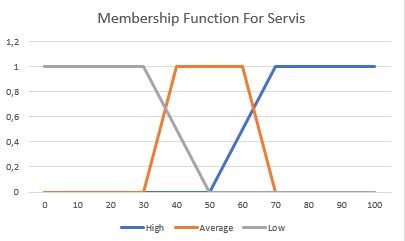

In [3]:
# Membership Function of servis
def member_servis(x):
  
  # Membership Function for servis (High)
  if x >= 70:
    High = 1
  elif x < 50:
    High = 0
  else:
    High = (x-50)/(70-50)
  
  # Membership Function for servis(Average)
  if 40 <= x <= 60:
    Average = 1
  elif x <= 30 or x >= 70:
    Average = 0
  elif 30 < x < 40:
    Average = (x-30)/(40-30)
  else:
    Average = (70-x)/(70-60)


  # Membership Function for servis(Low)
  if x <= 30:
    Low = 1
  elif x > 50:
    Low = 0
  else:
    Low = (50-x)/(50-30)

  return [High, Average, Low]
  

# contoh kasus
c_servis = 58
fuzzy_value = member_servis(c_servis)
print("High =",fuzzy_value[HIGH],"\nAverage =",fuzzy_value[AVERAGE],"\nLow =",fuzzy_value[LOW])

High = 0.4 
Average = 1 
Low = 0


# Member Function for harga
* **harga**>=7 is definitely **Expensive** and **harga**<5 is definitely not **Expensive**
* **Affordable** **harga** is considered between 4 to 6, while **harga**<=3 or **harga**>=7 is considered not Affordable
* **harga**<=3 is definitely **Cheap** and **harga**>5 is definitely not **Cheap**


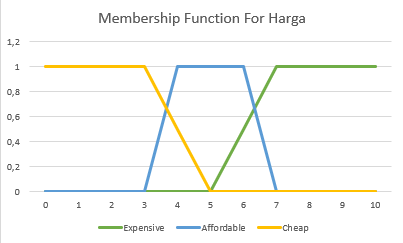

In [4]:
# Membership Function of harga
def member_harga(x):

  # Membership Function for harga(Expensive)
  if x >= 7:
    Expensive = 1
  elif x < 5:
    Expensive = 0
  else:
    Expensive = (x-5)/(7-5)

  # Membership Function for harga(Affordable)
  if 4 <= x <= 6:
    Affordable = 1
  elif x <= 3 or x >= 7:
    Affordable = 0
  elif 3 < x < 4:
    Affordable = (x-3)/(4-3)
  else:
    Affordable = (7-x)/(7-6)

  # Membership Function for harga(Cheap)
  if x <= 3:
    Cheap = 1
  elif x > 5:
    Cheap = 0
  else:
    Cheap = (5-x)/(5-3)
  
  return [Expensive, Affordable, Cheap]
  

# contoh kasus
c_harga = 7
fuzzy_value = member_harga(c_harga)
print("Expensive =",fuzzy_value[EXPENSIVE],"\nAffordable =",fuzzy_value[AFFORDABLE],"\nCheap =",fuzzy_value[CHEAP])

Expensive = 1 
Affordable = 0 
Cheap = 0


# Inference
Determine the fuzzy output using predefined rule


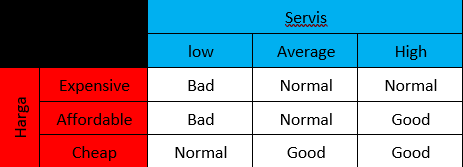

In [5]:
def inference(servis,harga):
  # Using Clipping technique, the conjunction rule will get the minimum value of fuzzy input as the fuzzy output
  good = [min(servis[HIGH], harga[AFFORDABLE]), min(servis[HIGH], harga[CHEAP]), min(servis[AVERAGE], harga[CHEAP])]
  normal = [min(servis[HIGH], harga[EXPENSIVE]), min(servis[AVERAGE], harga[EXPENSIVE]), min(servis[AVERAGE], harga[AFFORDABLE]), min(servis[LOW],harga[CHEAP])]
  bad = [min(servis[LOW], harga[EXPENSIVE]), min(servis[LOW], harga[AFFORDABLE])]
  # print(good,normal,bad)
  # Using Disjunction rule, get the maximum value for each fuzzy output
  good = max(good)
  normal = max(normal)
  bad = max(bad)
  return [good, normal, bad]

# Contoh Kasus
servis = [0,0,1]
harga = [1,0,0]
fuzzy_output = inference(servis,harga)
print("Good :", fuzzy_output[GOOD],"\nNormal :", fuzzy_output[NORMAL],"\nBad :", fuzzy_output[BAD])

Good : 0 
Normal : 0 
Bad : 1


# Deffuzification - Sugeno
### Apply the fuzzy output to the equation


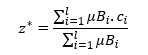

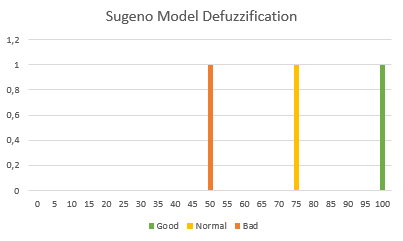

In [6]:
def defuzzification(x):
  pembilang = (x[0]*100)+(x[1]*75)+(x[2]*50)
  penyebut = x[0]+x[1]+x[2]
  z = pembilang / penyebut
  return z

# contoh kasus
fuzzy_output = [1,0,0]
defuzzification(fuzzy_output)

100.0

# Implementation

In [9]:
hasil = []
for i in range(len(id)):
    s_values = member_servis(servis[i])
    h_values = member_harga(harga[i])
    f_output = inference(s_values,h_values)
    hasil.append(defuzzification(f_output))
    # print(hasil)
    
Data['score'] = hasil
print(Data)

     id  servis  harga       score
0     1      58      7   75.000000
1     2      54      1  100.000000
2     3      98      2  100.000000
3     4      52      4   83.333333
4     5      11      4   58.333333
..  ...     ...    ...         ...
95   96      30      1   75.000000
96   97      25      3   75.000000
97   98      27     10   50.000000
98   99       8      6   50.000000
99  100      11      8   50.000000

[100 rows x 4 columns]


## Produce 10 id with the highest score

In [10]:
Data = Data.sort_values(by= "score", ascending=False)[:10]
Data

,id,servis,harga,score
74,75,61,1,100.0
90,91,98,3,100.0
2,3,98,2,100.0
43,44,63,2,100.0
33,34,93,4,100.0
1,2,54,1,100.0
51,52,94,3,100.0
16,17,70,3,100.0
14,15,78,5,100.0
91,92,83,3,100.0


# Save the output to a file

In [11]:
Data_result = pd.ExcelWriter('Data_result.xlsx')
Data.to_excel(Data_result)
Data_result.save()